# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

Boxplot is better as the primary chart, because it directly highlights the upper quartile (75th percentile) and outliers for the “expensive drugs” story.Hides distribution shape cannot see “where” values cluster.With a heavily right-skewed dataset (like exp()), the box can look squashed and most info gets pushed into the outlier dots.

Histogram gives the overall distribution shape. if the admin needs context like “most prices are low and a few are extremely high,” we can pair it with a histogram (or use a log scale).Bin choice should be good.It does nto show percentiles specifically like box plot

formatting improvements are provided below.

In [35]:
import numpy as np
import pandas as pd

from datetime import datetime, timedelta
import kagglehub
import os


np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

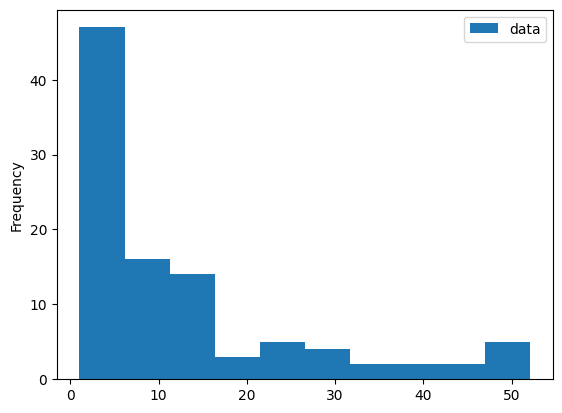

In [36]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

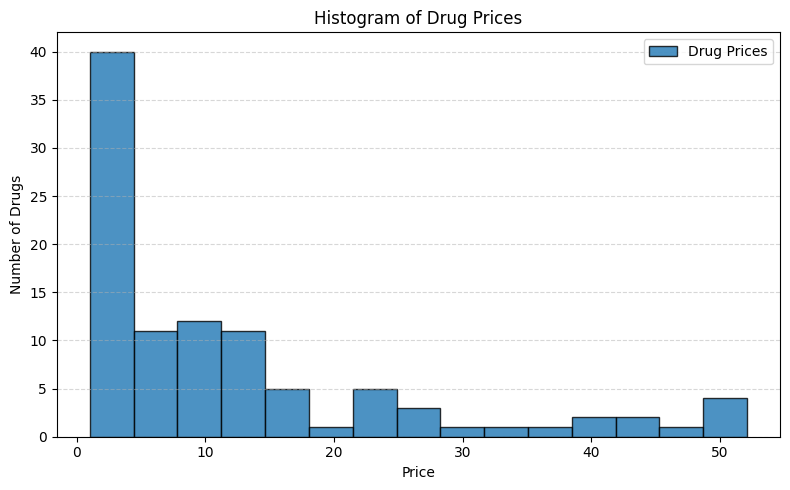

In [37]:
#improvememnts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate data
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame({"data": data})

# Create improved histogram
plt.figure(figsize=(8, 5))

plt.hist(df["data"], bins=15, edgecolor="black", alpha=0.8, label="Drug Prices")

plt.title("Histogram of Drug Prices")
plt.xlabel("Price")
plt.ylabel("Number of Drugs")

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

<Axes: >

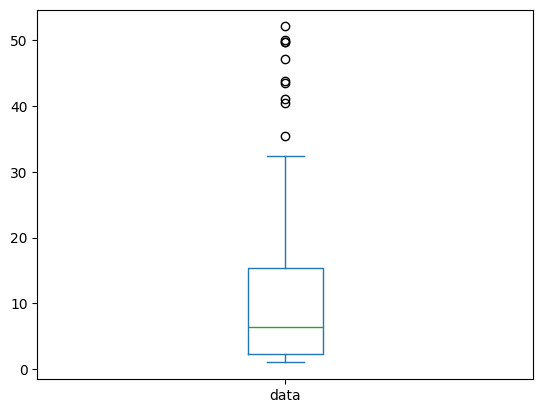

In [38]:
df.plot.box()

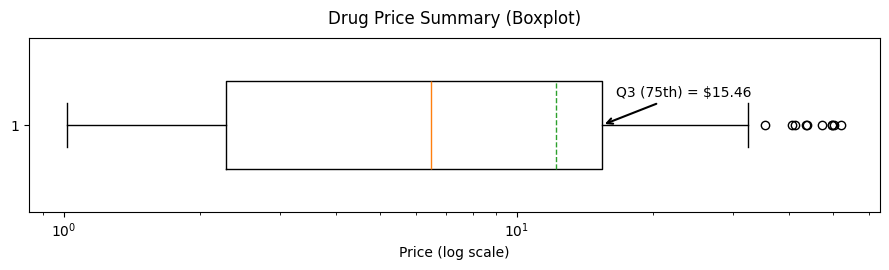

In [39]:
# ----------------------------
# 5) Improved Boxplot (horizontal)
# ----------------------------

from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots(figsize=(9, 2.8))

ax.boxplot(
    df["data"],
    vert=False,
    showmeans=True,
    meanline=True,
    widths=0.5
)

ax.set_title("Drug Price Summary (Boxplot)", pad=10)
ax.set_xlabel("Price")

def dollars(x, pos):
    return f"${x:,.0f}"

currency_fmt = FuncFormatter(dollars)
ax.xaxis.set_major_formatter(currency_fmt)

USE_LOG_X = True
if USE_LOG_X:
    ax.set_xscale("log")
    ax.set_xlabel("Price (log scale)")

q75 = float(df["data"].quantile(0.75))
median = float(df["data"].median())

# Add an annotation for Q3 (75th percentile)
ax.annotate(
    f"Q3 (75th) = ${q75:,.2f}",
    xy=(q75, 1),
    xytext=(10, 18),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=1.5),
    ha="left",
    va="bottom"
)

plt.tight_layout()
plt.show()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [40]:
# from week 2
today = pd.Timestamp.today().normalize()

# Dataset used: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

# Download the dataset from Kaggle
path = kagglehub.dataset_download ("laotse/credit-risk-dataset")
print("Dataset downloaded to:", path)

# List available files
files = os.listdir(path)
print("Available files:", files)

# Load the CSV file
csv_file = os.path.join(path, files[0])
df_loan = pd.read_csv(csv_file)

print(f"\nDataset shape: {df_loan.shape}")
df_loan.head()

#path = kagglehub.dataset_download("username/dataset-name")

df_loan.describe()
df_loan.info()

# total nulls per column.Only two columns have nulls
print ("total nulls: ",df_loan.isnull().sum())

df_loan = df_loan.drop_duplicates(keep="first")
df_loan[df_loan.duplicated()] # no dups now

#fill nulls for employment length  with zero

df_loan["person_emp_length"] = df_loan["person_emp_length"].fillna(0)



#fill nulls for loan_int_rate  with median 


df_loan["loan_int_rate"] = df_loan["loan_int_rate"].fillna(
    df_loan["loan_int_rate"].median()
)

print ("total nulls: ",df_loan.isnull().sum())
one_hot = pd.get_dummies(df_loan["cb_person_default_on_file"], prefix ="cb_person_default_on_file", dtype=int)
df_loan1 = df_loan.join(one_hot)

df_loan1.drop(columns=["loan_status"], inplace=True,errors="ignore") # this is the target variable hence drop it
df_loan1.head(5)


#mean and median only for numerical fields
num = df_loan1.select_dtypes(include=np.number)

numeric_summary = num.agg(["mean", "median"]).T
numeric_summary["mode"] = num.mode().iloc[0]   # take first mode for each column

numeric_summary


# mode for categorical variable

cat = df_loan1.select_dtypes(exclude=np.number)
categorical_summary = pd.DataFrame({
    "mode": cat.mode().iloc[0]
})

categorical_summary

# ----------------------------
# 1) Identify numeric vs categorical columns
# ----------------------------
num_cols = df_loan1.select_dtypes(include="number").columns.tolist()
cat_cols = df_loan1.columns.difference(num_cols).tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)



Dataset downloaded to: /home/codespace/.cache/kagglehub/datasets/laotse/credit-risk-dataset/versions/1
Available files: ['credit_risk_dataset.csv']

Dataset shape: (32581, 12)
<class 'pandas.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  str    
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  str    
 5   loan_grade                  32581 non-null  str    
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non

In [41]:
#get Feature importance based on random forest model

import sys
!{sys.executable} -m pip install scikit-learn

from sklearn.ensemble import RandomForestClassifier

# Start from original dataset
df_model = df_loan.copy()

# One-hot encode all categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

# Split features and target
X = df_model.drop("loan_status", axis=1)
y = df_model["loan_status"]

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)
print("Top 10 important features:\n", importances.sort_values(ascending=False).head(10))

Top 10 important features:
 loan_percent_income           0.219093
person_income                 0.154282
loan_int_rate                 0.124821
loan_amnt                     0.077004
person_home_ownership_RENT    0.076447
person_emp_length             0.060033
loan_grade_D                  0.053120
person_age                    0.048875
cb_person_cred_hist_length    0.036970
loan_grade_C                  0.018505
dtype: float64


Based on feature importance,filtered the top 6 features to do visualization and further analysis.

    loan_percent_income → Debt burden relative to income
    person_income → Earning capacity
    loan_int_rate → Cost of borrowing
    loan_amnt → Loan size
    person_home_ownership → Financial stability indicator (rent, own, mortgage)
    person_emp_length → Employment stability


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

top_features = [
    "loan_percent_income",
    "person_income",
    "loan_int_rate",
    "loan_amnt",
    "person_home_ownership_RENT",
    "person_emp_length"
]

df_viz = df_loan.copy()

## Univariate Analysis — Means, Medians & Modes

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ── Identify column types 
num_cols = df_viz.select_dtypes(include="number").columns.tolist()
cat_cols = df_viz.select_dtypes(exclude="number").columns.tolist()

# ── Numeric summary ─
numeric_summary = df_viz[num_cols].agg(["mean", "median"]).T
numeric_summary.columns = ["Mean", "Median"]
numeric_summary["Mode"] = df_viz[num_cols].mode().iloc[0]
numeric_summary = numeric_summary.round(4)

print("=== Numeric Features — Mean / Median / Mode ===")
display(numeric_summary)

# ── Categorical summary 
cat_summary = pd.DataFrame({
    "Mode":  df_viz[cat_cols].mode().iloc[0],
    "Unique Values": df_viz[cat_cols].nunique()
})

print("\n=== Categorical Features — Mode & Unique Count ===")
display(cat_summary)


=== Numeric Features — Mean / Median / Mode ===


,Mean,Median,Mode
person_age,27.7470,26.00,23.00
person_income,66091.6408,55000.00,60000.00
person_emp_length,4.6594,4.00,0.00
loan_amnt,9593.8456,8000.00,10000.00
loan_int_rate,11.0147,10.99,10.99
loan_status,0.2187,0.00,0.00
loan_percent_income,0.1702,0.15,0.10
cb_person_cred_hist_length,5.8113,4.00,2.00



=== Categorical Features — Mode & Unique Count ===


,Mode,Unique Values
person_home_ownership,RENT,4
loan_intent,EDUCATION,6
loan_grade,A,7
cb_person_default_on_file,N,2


## KDE Plots — Numeric Features

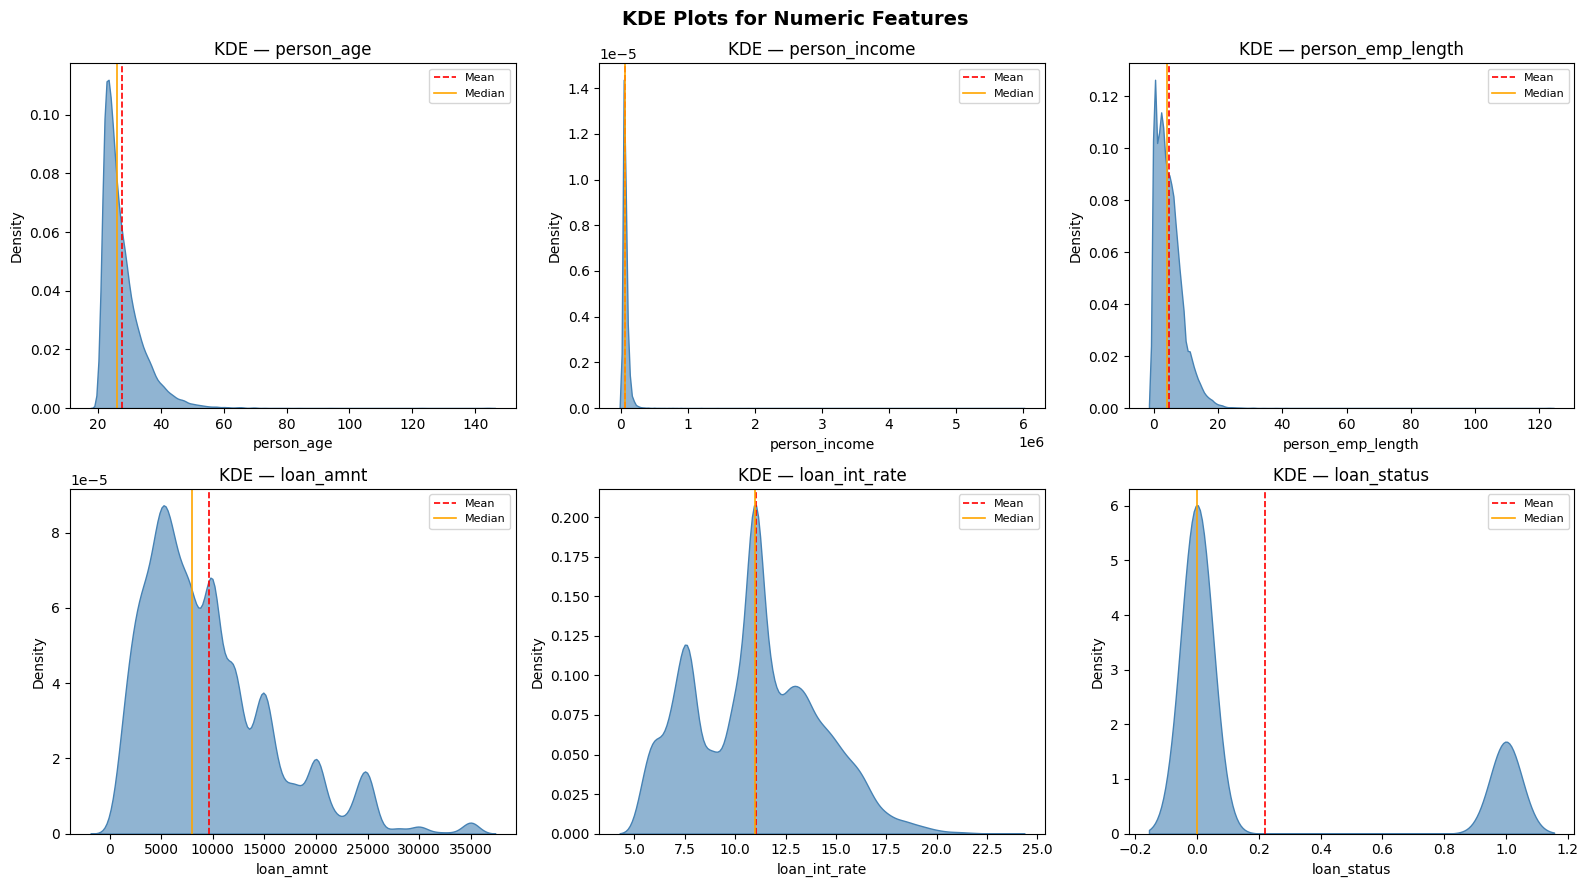

In [44]:
# KDE (Kernel Density Estimate) — smoothed view of the distribution
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
axes = axes.flatten()

for i, col in enumerate(num_cols[:6]):
    sns.kdeplot(df_viz[col].dropna(), ax=axes[i], fill=True, color="steelblue", alpha=0.6)
    axes[i].axvline(df_viz[col].mean(),   color="red",    linestyle="--", linewidth=1.2, label="Mean")
    axes[i].axvline(df_viz[col].median(), color="orange", linestyle="-",  linewidth=1.2, label="Median")
    axes[i].set_title(f"KDE — {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")
    axes[i].legend(fontsize=8)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("KDE Plots for Numeric Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## Violin Plots — Numeric Features by Loan Status

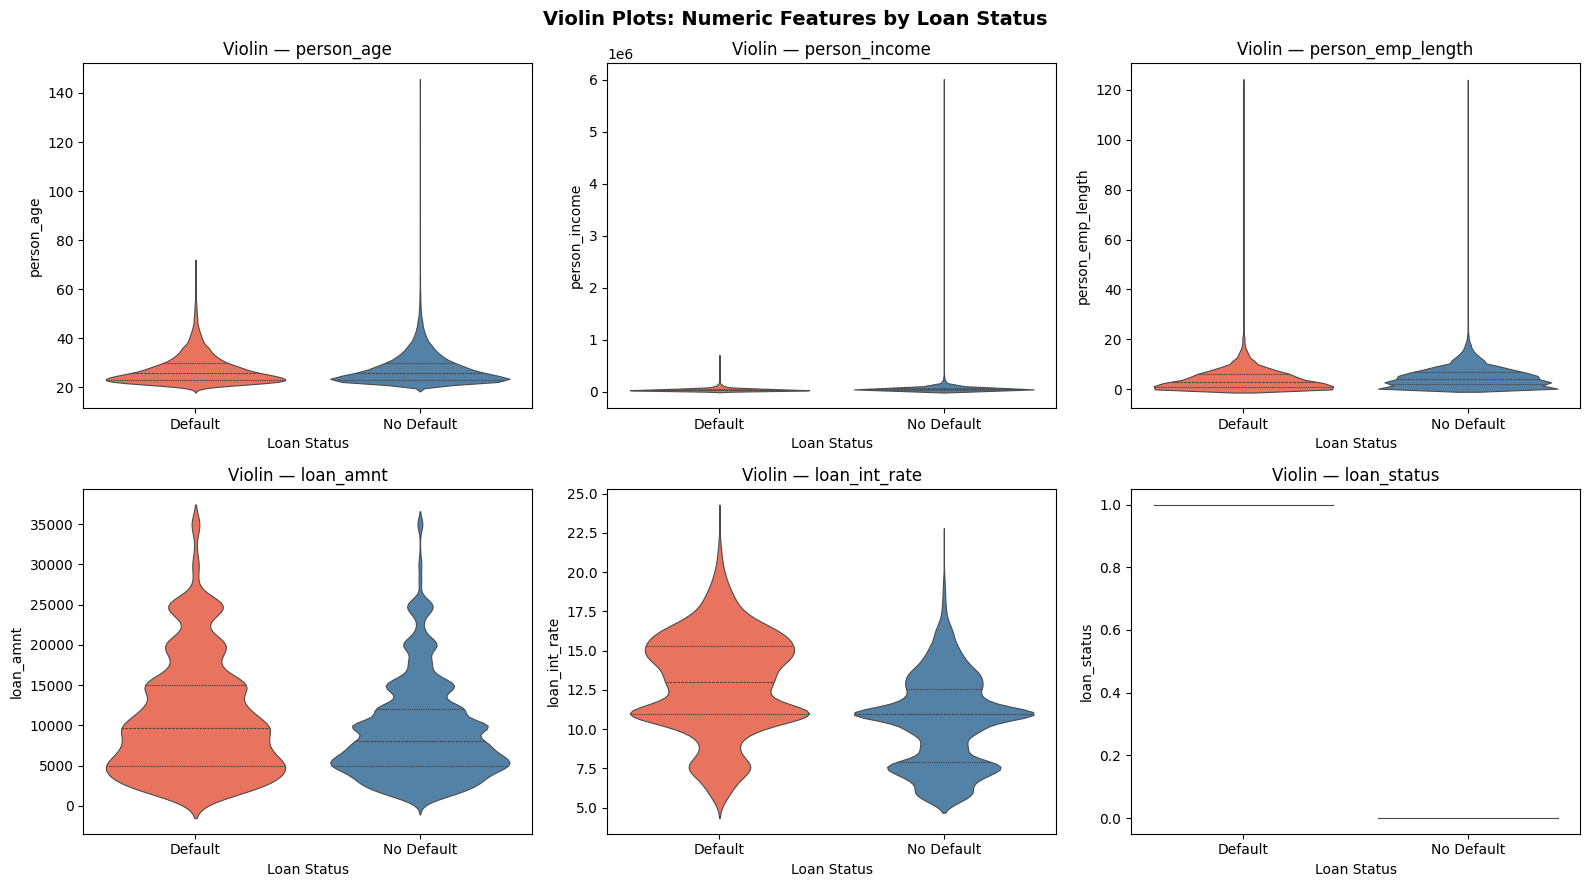

In [45]:
# Violin plots split by loan_status (0 = no default, 1 = default)
# Shows full distribution shape + quartiles for each group
df_viz["loan_status_label"] = df_viz["loan_status"].map({0: "No Default", 1: "Default"})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
axes = axes.flatten()

palette = {"No Default": "steelblue", "Default": "tomato"}

for i, col in enumerate(num_cols[:6]):
    sns.violinplot(
        data=df_viz,
        x="loan_status_label",
        y=col,
        ax=axes[i],
        hue="loan_status_label",
        palette=palette,
        legend=False,
        inner="quartile",   # draws Q1, median, Q3 inside the violin
        linewidth=0.8
    )
    axes[i].set_title(f"Violin — {col}")
    axes[i].set_xlabel("Loan Status")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Violin Plots: Numeric Features by Loan Status", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## Swarm Plots — Numeric Features by Loan Status

/tmp/ipykernel_51740/1611452445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/tmp/ipykernel_51740/1611452445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/usr/local/python/3.12.1/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/ipykernel_51740/1611452445.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/usr/local/python/3.12.1/lib/python3.12/site-packag

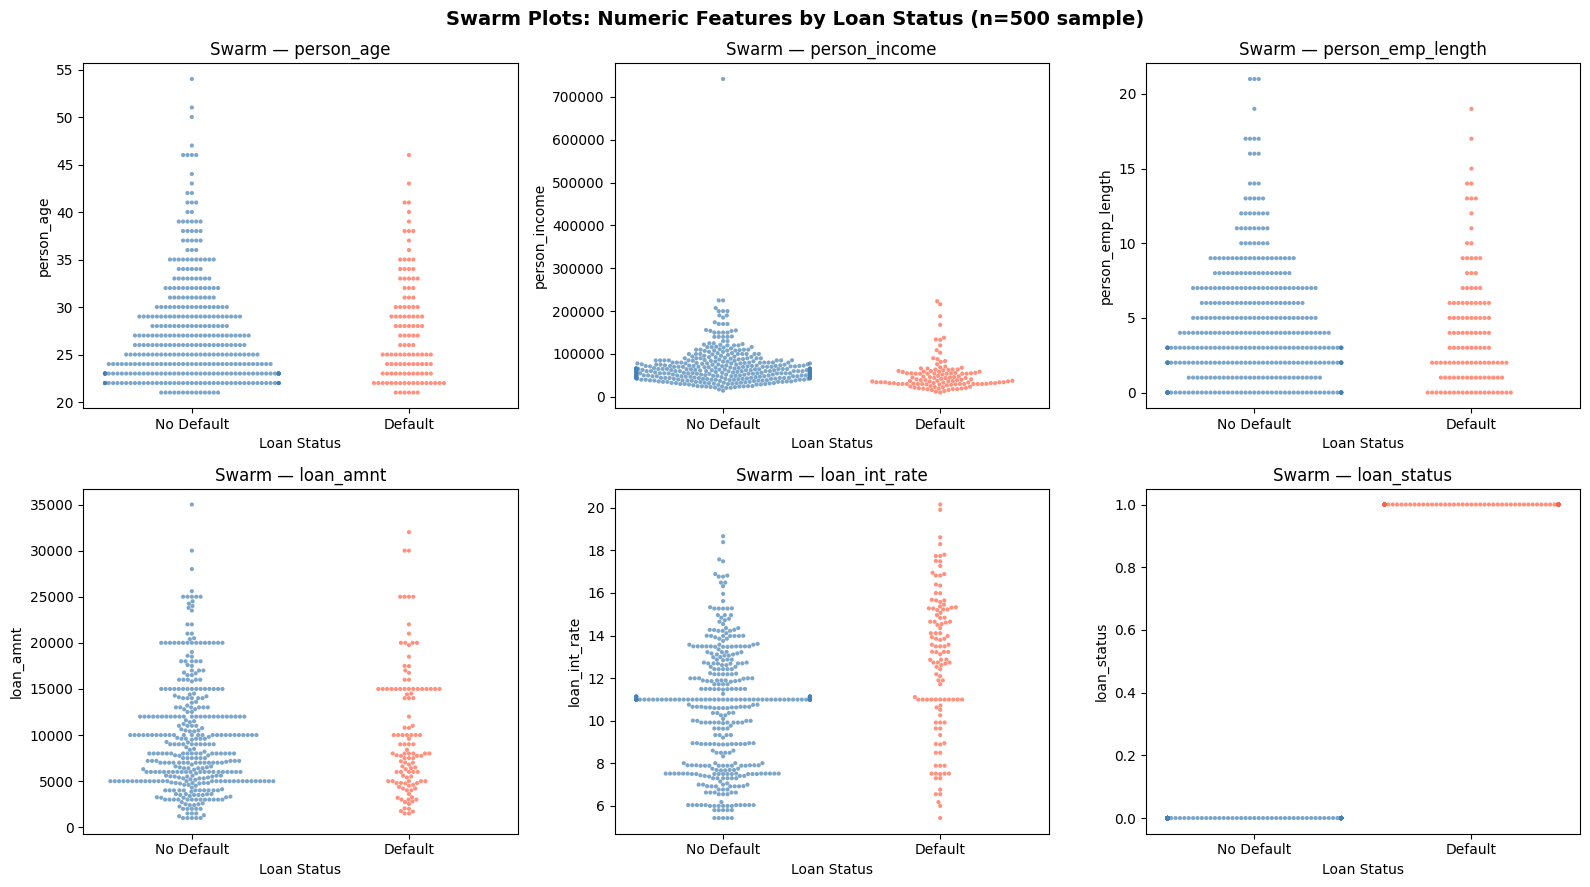

In [46]:
# Swarm plots — each dot is one observation; no overlap hiding
# Use a sample to keep rendering fast (swarm is O(n^2))
df_swarm = df_viz.sample(n=min(500, len(df_viz)), random_state=42)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
axes = axes.flatten()

for i, col in enumerate(num_cols[:6]):
    sns.swarmplot(
        data=df_swarm,
        x="loan_status_label",
        y=col,
        ax=axes[i],
        palette=palette,
        size=3,
        alpha=0.7
    )
    axes[i].set_title(f"Swarm — {col}")
    axes[i].set_xlabel("Loan Status")
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Swarm Plots: Numeric Features by Loan Status (n=500 sample)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## Grouped Histograms — Numeric Features by Loan Status

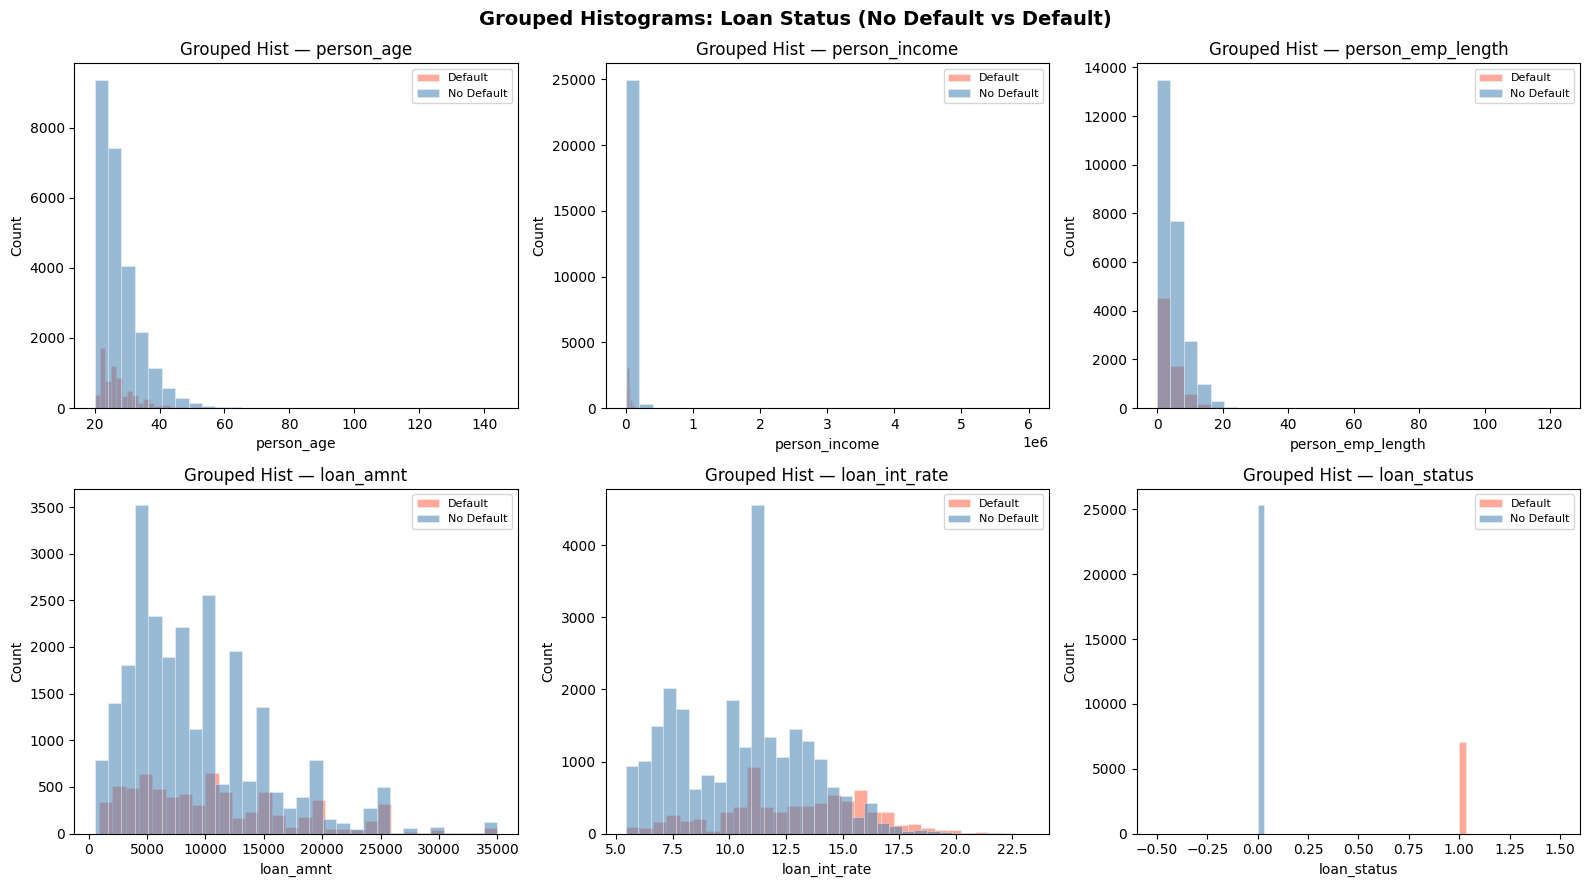

In [47]:
# Grouped (overlapping) histograms — one histogram per group, overlaid
# Lets us compare the distribution of defaulters vs non-defaulters side-by-side

groups = df_viz.groupby("loan_status_label")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
axes = axes.flatten()

for i, col in enumerate(num_cols[:6]):
    for label, grp in groups:
        axes[i].hist(
            grp[col].dropna(),
            bins=30,
            alpha=0.55,
            label=label,
            color=palette[label],
            edgecolor="white",
            linewidth=0.4
        )
    axes[i].set_title(f"Grouped Hist — {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].legend(fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Grouped Histograms: Loan Status (No Default vs Default)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## Bar Plots — Categorical Features (Count of Each Category)

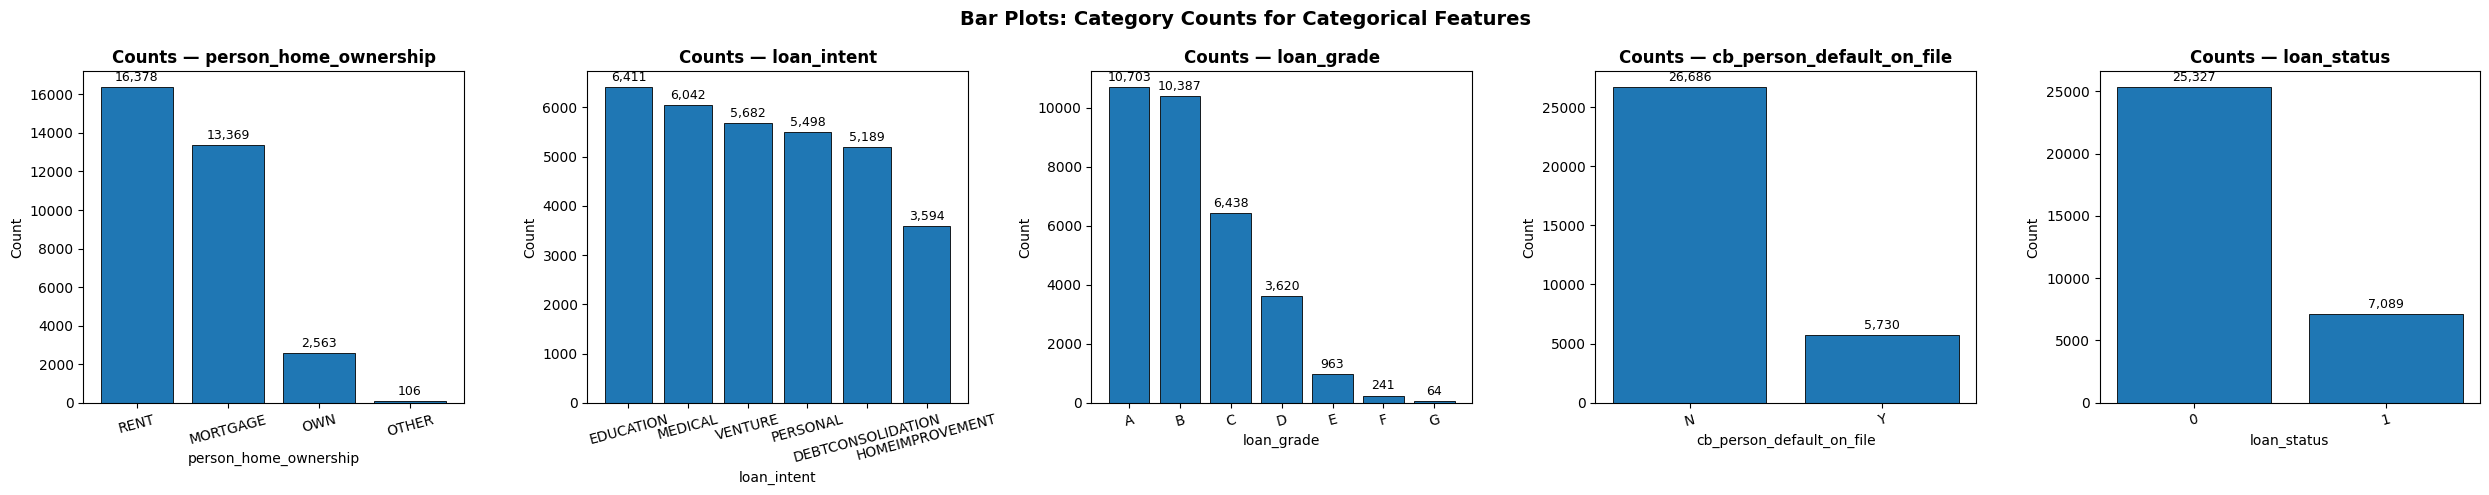

In [48]:
# Bar plots for every categorical column — shows total count of each category
# Also includes loan_status (binary target) as a bar chart

all_cat_cols = cat_cols + ["loan_status"]   # add target for completeness

n_cats = len(all_cat_cols)
fig, axes = plt.subplots(nrows=1, ncols=n_cats, figsize=(5 * n_cats, 5))
if n_cats == 1:
    axes = [axes]

for ax, col in zip(axes, all_cat_cols):
    counts = df_viz[col].value_counts().sort_values(ascending=False)
    bars = ax.bar(counts.index.astype(str), counts.values, edgecolor="black", linewidth=0.6)

    # Add count labels on top of each bar
    for bar, val in zip(bars, counts.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + counts.max() * 0.01,
            f"{val:,}",
            ha="center", va="bottom", fontsize=9
        )

    ax.set_title(f"Counts — {col}", fontweight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis="x", rotation=15)

plt.suptitle("Bar Plots: Category Counts for Categorical Features", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


## Conclusions — Univariate Analysis of Credit Risk Dataset

=== Min / Max / Range per Numeric Feature ===


,Min,Max,Range
person_age,20.00,144.00,124.00
person_income,4000.00,6000000.00,5996000.00
person_emp_length,0.00,123.00,123.00
loan_amnt,500.00,35000.00,34500.00
loan_int_rate,5.42,23.22,17.80
loan_status,0.00,1.00,1.00
loan_percent_income,0.00,0.83,0.83
cb_person_cred_hist_length,2.00,30.00,28.00


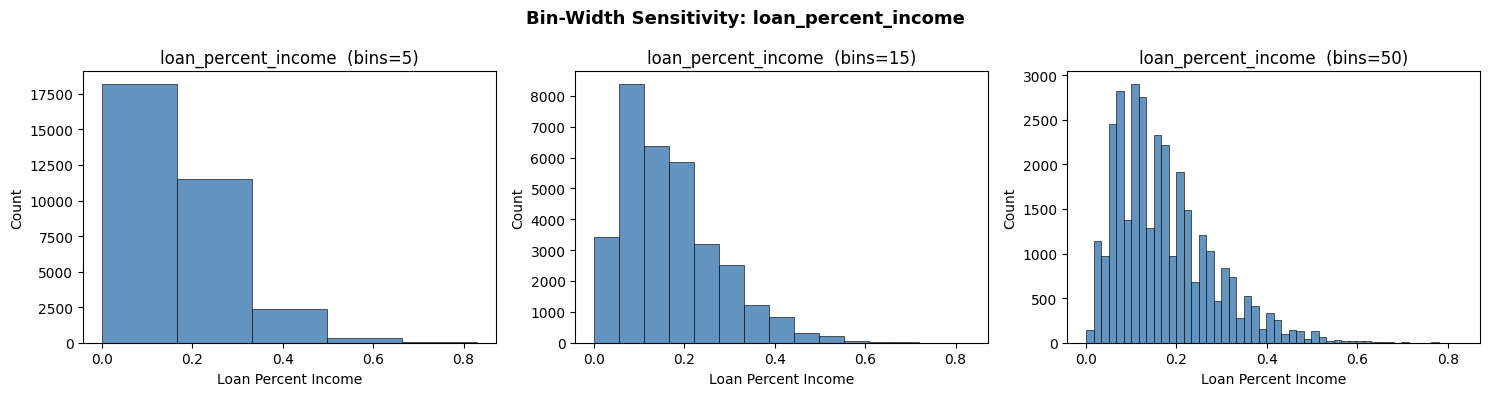

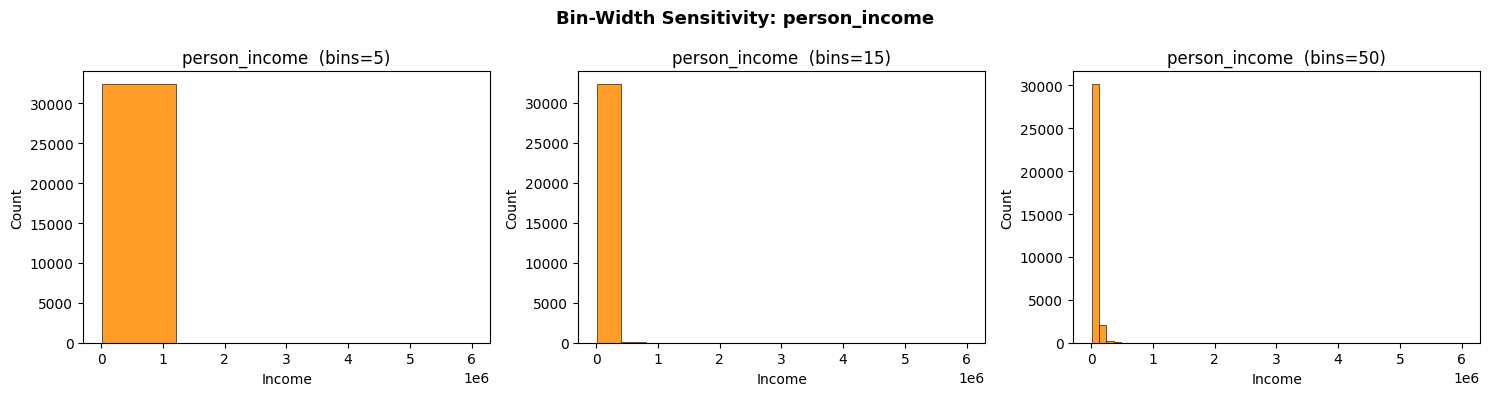

In [49]:
# ── Min / Max summary for every numeric feature ────────────────────────────────
minmax = df_viz[num_cols].agg(["min", "max"]).T
minmax.columns = ["Min", "Max"]
minmax["Range"] = minmax["Max"] - minmax["Min"]
print("=== Min / Max / Range per Numeric Feature ===")
display(minmax.round(4))

# ── Bin-width sensitivity: compare 5, 15, and 50 bins on loan_percent_income ──
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=False)
bin_choices = [5, 15, 50]

for ax, bins in zip(axes, bin_choices):
    ax.hist(df_viz["loan_percent_income"].dropna(), bins=bins,
            edgecolor="black", linewidth=0.5, color="steelblue", alpha=0.85)
    ax.set_title(f"loan_percent_income  (bins={bins})")
    ax.set_xlabel("Loan Percent Income")
    ax.set_ylabel("Count")

plt.suptitle("Bin-Width Sensitivity: loan_percent_income", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

# ── Bin-width sensitivity on person_income (highly skewed) ────────────────────
fig2, axes2 = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

for ax, bins in zip(axes2, bin_choices):
    ax.hist(df_viz["person_income"].dropna(), bins=bins,
            edgecolor="black", linewidth=0.5, color="darkorange", alpha=0.85)
    ax.set_title(f"person_income  (bins={bins})")
    ax.set_xlabel("Income")
    ax.set_ylabel("Count")

plt.suptitle("Bin-Width Sensitivity: person_income", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()


Conclusions

1. Are the data realistic and usable for credit risk modeling?

    Yes, the dataset looks realistic and usable. It contains 32,581 rows and 11 features. Only two columns had missing values, and those were filled in. There were no duplicate records after cleaning. Although the data are imbalanced (about 78% non-default and 22% default), this is normal in credit datasets and can be handled during modeling 

2. What do the distributions look like?

    Most of the numeric features are right-skewed. This means most values are small or moderate, with a few very large values stretching the distribution to the right.

3. Which variables are strongly skewed?

    Income, employment length, loan percent income, age, and credit history length are all right-skewed. Most borrowers fall in lower or moderate ranges, with a few extreme values.

4. Are any variables bimodal?

    Yes. Loan interest rate and loan amount show two peaks. This likely reflects different loan grades or common borrowing amounts (like $5k, $10k, $20k).

5. Are there outliers? Do any variables contain extreme or unrealistic values?

    Yes. Some values appear to be data entry errors. For example, age has a maximum of 144 years and employment length goes up to 123 years, which are not realistic. Income has a maximum of $6 million, which may be valid but strongly affects the distribution.
    In practice, unrealistic values should be filtered or capped. Income may also benefit from a log transformation to reduce skew.

4. How do distributions differ between defaulters and non-defaulters?

    Interest rate shows the clearest difference. Defaulters tend to have higher interest rates. Loan percent income is also higher for defaulters, meaning they carry more debt relative to income. Defaulters tend to have slightly lower incomes and slightly higher loan amounts, but there is significant overlap between the two groups.

5. Do age and employment length differ much?

    No. These distributions look very similar for both groups, meaning they likely have lower predictive power.

6. What are the minimum and maximum values? Are the ranges large?

    Yes, especially for income and employment length. Income ranges from $4,000 to $6,000,000, which creates extreme skew. Age and employment length also have unrealistic maximum values that inflate the range.

7. How do bin sizes affect the histogram? Does the number of bins change the interpretation?

    Yes. Too few bins hide structure and make the data look overly simple. Too many bins make the histogram noisy. Around 15–20 bins gives a good balance.

8. Why is income hard to visualize?

    Because of the very large outlier ($6M), most of the data collapses into one bar. A log scale or removing extreme outliers is needed for better visualization.

9. Are any variables normally distributed? Do any features follow a normal (bell-curve) distribution?

    No. Most features are right-skewed, and a few are bimodal. None resemble a normal distribution.
    Some variables, especially income and loan amount, may benefit from transformation (like log scaling) to improve model performance.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

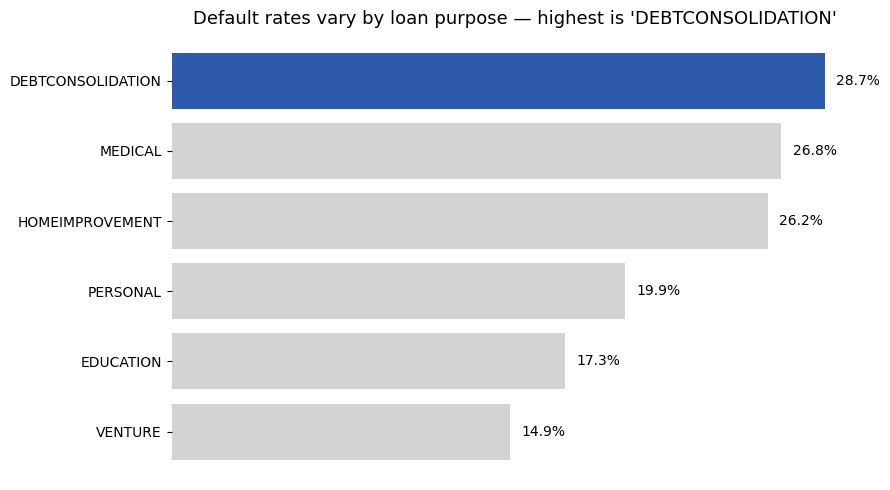

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


df = df_loan.copy()

# 1) Compute default rate by loan intent (mean of 0/1 target)
default_by_intent = (
    df.groupby("loan_intent")["loan_status"]
      .mean()
      .sort_values(ascending=True)  # small to large for nice story at the end/top
)

# 2) Identify category to highlight (highest default rate)
highlight_cat = default_by_intent.idxmax()

# 3) Colors: gray for all, highlight one
colors = ["lightgray" if cat != highlight_cat else "#2E5AAC" for cat in default_by_intent.index]

# 4) Plot (clean horizontal bar chart)
plt.figure(figsize=(9, 5))
bars = plt.barh(default_by_intent.index, default_by_intent.values, color=colors)

# 5) Remove chart junk (SWD style)
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Remove x-axis ticks (we'll label bars directly)
plt.xticks([])
plt.xlabel("")
plt.ylabel("")

# 6) Add direct labels (percent)
for i, (cat, rate) in enumerate(default_by_intent.items()):
    plt.text(rate + 0.005, i, f"{rate*100:.1f}%", va="center", fontsize=10)

# 7) Title that states the insight (SWD recommendation)
plt.title(f"Default rates vary by loan purpose — highest is '{highlight_cat}'", fontsize=13)

plt.tight_layout()
plt.show()

The chart shows that default rates differ clearly by loan purpose, with Debt Consolidation loans having the highest default rate at 28.7%, followed by Medical and Home Improvement loans. In contrast, Venture and Education loans have the lowest default rates. This suggests that borrowers taking loans to consolidate existing debt may already be under financial stress, increasing their likelihood of default.